# Random walks

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator
import numpy as np
from tqdm import tqdm

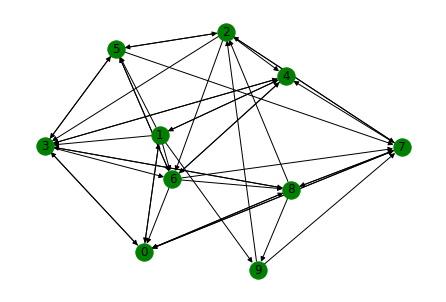

<Figure size 1080x720 with 0 Axes>

In [3]:
# select random graph using gnp_random_graph() function of networkx
Graph = nx.gnp_random_graph(10, 0.5, directed=True)
nx.draw(Graph, with_labels=True, node_color="green")  # draw the network graph
plt.figure(figsize=(15, 10))
plt.show()  # to show the graph by plotting it

In [12]:
# random_node is the start node selected randomly
random_node = random.choice([i for i in range(Graph.number_of_nodes())])

dict_counter = {}  # initialise the value for all nodes as 0
for i in range(Graph.number_of_nodes()):
    dict_counter[i] = 0

# increment by traversing through all neighbors nodes
dict_counter[random_node] = dict_counter[random_node] + 1

# Traversing through the neighbors of start node
for i in range(10000):
    list_for_nodes = list(Graph.neighbors(random_node))
    if len(list_for_nodes) == 0:  # if random_node having no outgoing edges
        random_node = random.choice([i for i in range(Graph.number_of_nodes())])
        dict_counter[random_node] = dict_counter[random_node] + 1

    else:
        random_node = random.choice(
            list_for_nodes
        )  # choose a node randomly from neighbors
        dict_counter[random_node] = dict_counter[random_node] + 1

In [13]:
# using pagerank() method to provide ranks for the nodes
rank_node = nx.pagerank(Graph)

# sorting the values of rank and random walk of respective nodes
sorted_rank = sorted(rank_node.items(), key=operator.itemgetter(1))
sorted_random_walk = sorted(dict_counter.items(), key=operator.itemgetter(1))

In [14]:
sorted_rank

[(9, 0.04333861279724398),
 (1, 0.0702697202807392),
 (5, 0.08321855212539782),
 (2, 0.09691963234696936),
 (8, 0.10813920075113743),
 (4, 0.11065195201382218),
 (0, 0.11255917470257852),
 (6, 0.11303707436422232),
 (7, 0.12909758902018287),
 (3, 0.13276849159770635)]

In [15]:
sorted_random_walk

[(9, 333),
 (1, 661),
 (5, 783),
 (2, 950),
 (8, 1122),
 (6, 1134),
 (0, 1138),
 (4, 1159),
 (7, 1345),
 (3, 1376)]

In [16]:
from scipy.stats import spearmanr

spearmanr([x[0] for x in sorted_rank], [x[0] for x in sorted_random_walk])

SpearmanrResult(correlation=0.9515151515151514, pvalue=2.279854920641689e-05)

## prediction of pagerank

In [19]:
def predicted_rank(in_degrees, q=0.85):
    av = np.mean(in_degrees)
    N = len(in_degrees)
    return q / N + ((1 - q) / N) * (np.array(in_degrees) / av)

## ER graph

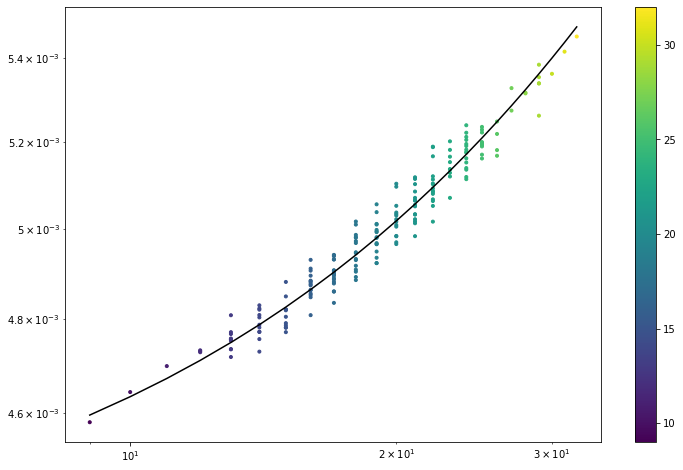

In [21]:
G = nx.DiGraph(nx.erdos_renyi_graph(200, 0.1))

q = 0.85
pr = nx.pagerank(G, alpha=1 - q)

in_degrees = [G.in_degree(x) for x in pr]
out_degrees = [G.out_degree(x) for x in pr]

fig = plt.figure(figsize=(12, 8))
plt.scatter(in_degrees, pr.values(), c=out_degrees, marker=".")
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.plot(sorted(in_degrees), predicted_rank(sorted(in_degrees), q), "k-")

## real world graph

In [22]:
# filepath  = "./../datasets/USairport_2010.txt"
filepath = "./../datasets/cit-HepTh.txt"
G = nx.DiGraph()
fh = open(filepath, "r")
for line in fh.readlines():
    s = line.strip().split()
    if s[0] != "#":
        origin = int(s[0])
        dest = int(s[1])
        G.add_edge(origin, dest)
fh.close()

In [23]:
GCC = G.subgraph(list(nx.weakly_connected_components(G))[0])
GCC.number_of_nodes()

27400

In [24]:
ranks = nx.pagerank(GCC, alpha=1 - q)
ranks

{1001: 3.2602499246893044e-05,
 9304045: 4.071306164225111e-05,
 9308122: 6.479306620003078e-05,
 9309097: 8.698076219806325e-05,
 9311042: 4.5027491416976204e-05,
 9401139: 0.0002062551248078757,
 9404151: 5.263194784399839e-05,
 9407087: 0.000657918655059675,
 9408099: 0.000435401415075891,
 9501030: 7.183653532234046e-05,
 9503124: 0.0003809559588067761,
 9504090: 0.00013857143647131768,
 9504145: 8.315079544067203e-05,
 9505025: 4.028424998714547e-05,
 9505054: 4.735170114694794e-05,
 9505105: 0.0001002915296066482,
 9505162: 7.5393056368472e-05,
 9506048: 4.515780210886138e-05,
 9506112: 6.813057106676225e-05,
 9506144: 5.227848260853375e-05,
 9507050: 7.362582036791592e-05,
 9507158: 0.00012099234013801616,
 9508094: 4.9926041251757153e-05,
 9508155: 6.809694853171543e-05,
 9510142: 4.017626740799703e-05,
 9510225: 7.76787039787459e-05,
 9510234: 4.6642662505665174e-05,
 9511030: 0.0001161820133031774,
 9511171: 4.007831301786174e-05,
 9601108: 4.9613164206003e-05,
 9602022: 0.00

In [25]:
in_degrees = [GCC.in_degree(x) for x in ranks]
out_degrees = [GCC.out_degree(x) for x in ranks]

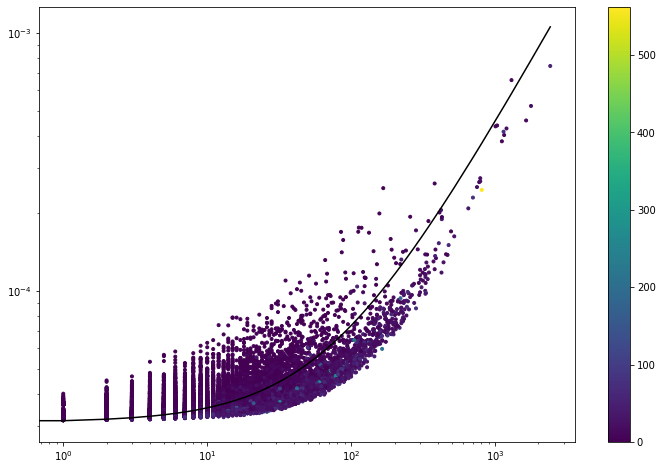

In [27]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(in_degrees, ranks.values(), c=out_degrees, marker=".")
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.plot(sorted(in_degrees), predicted_rank(sorted(in_degrees), q), "k-")

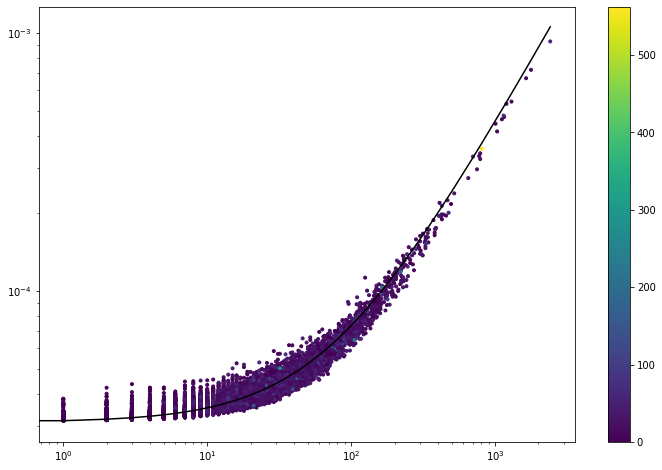

In [28]:
new_G = nx.directed_configuration_model(in_degrees, out_degrees)
cm_ranks = nx.pagerank(new_G, 1 - q)

cm_in_degrees = [new_G.in_degree(x) for x in cm_ranks]
cm_out_degrees = [new_G.out_degree(x) for x in cm_ranks]
fig = plt.figure(figsize=(12, 8))
plt.scatter(cm_in_degrees, cm_ranks.values(), c=cm_out_degrees, marker=".")
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.plot(sorted(cm_in_degrees), predicted_rank(sorted(cm_in_degrees), q), "k-")

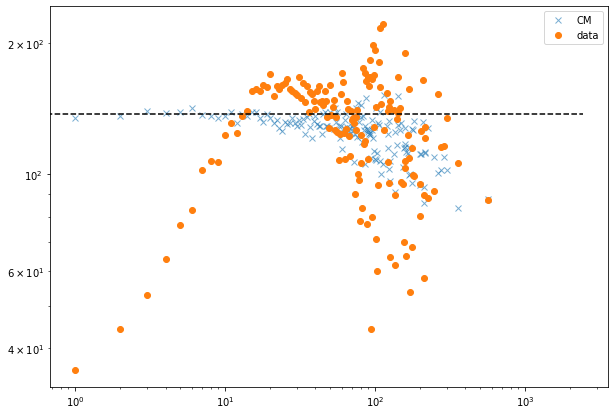

In [29]:
knn_G = nx.average_degree_connectivity(G, source="out", target="in")
knn_CM_G = nx.average_degree_connectivity(new_G, source="out", target="in")
k1, k2 = np.mean(np.array(in_degrees)), np.mean(np.array(in_degrees) ** 2)

plt.figure(figsize=(10, 7))
plt.loglog(knn_CM_G.keys(), knn_CM_G.values(), "x", alpha=0.6, label="CM")
plt.loglog(knn_G.keys(), knn_G.values(), "o", label="data")
plt.hlines(
    k2 / k1, np.min(in_degrees), np.max(in_degrees), colors="k", linestyles="dashed"
)
plt.legend()

---
---

# Explicit walks 

In [ ]:
## Code imported from https://github.com/kerighan/graph-walker

!pip install pybind11
!pip install graph-walker

## Example of walks on ER graph

In [30]:
import walker

# create a random graph
G = nx.fast_gnp_random_graph(5000, 0.01, directed=True)

# generate random walks
X = walker.random_walks(G, n_walks=50, walk_len=25)
X

/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=0.70s


array([[   0, 4087, 1295, ..., 3774, 1044, 2049],
       [   1, 2678, 4709, ..., 1313, 4554, 3188],
       [   2,  849, 4456, ..., 3542,  315, 2412],
       ...,
       [4997,  492, 3839, ..., 1666, 3719, 3015],
       [4998, 2239, 3284, ..., 1116, 3287, 2147],
       [4999, 1463, 1750, ..., 1026, 2126, 2195]], dtype=uint32)

In [31]:
X.shape

(250000, 25)

In [32]:
# generate random walks with restart probability alpha
X = walker.random_walks(G, n_walks=50, walk_len=25, alpha=0.1)

Random walks - T=0.70s


In [33]:
# you can generate random walks from specified starting nodes
X = walker.random_walks(G, n_walks=50, walk_len=25, start_nodes=[0, 1, 2])

Random walks - T=0.61s


In [35]:
X.shape

(150, 25)

In [36]:
# generate random walks according to Node2Vec methodology by specifying p and q
X = walker.random_walks(G, n_walks=50, walk_len=25, p=0.25, q=0.25)

Random walks - T=2.51s


In [37]:
X

array([[   0, 4706, 1241, ..., 3031, 4909, 4553],
       [   1, 3290, 1440, ..., 2140,  350,  599],
       [   2, 1287, 1855, ..., 1161, 2383, 4447],
       ...,
       [4997, 2354, 1807, ..., 1826, 2404,  430],
       [4998, 1150, 4269, ...,  501, 1600, 4182],
       [4999, 3047, 1438, ..., 1966,  503, 3457]], dtype=uint32)

# Return times

### Return times on ER graph

In [43]:
def return_time(walk, verbose=False):
    starting_node = walk[0]
    return_times = [t for (t, n) in enumerate(walk) if n == starting_node]
    if verbose == True:
        print(return_times)
    if len(return_times) > 1:
        return np.diff(return_times)
    else:
        return [len(walk)];

In [39]:
print(set(dict(G.in_degree).values()))

{24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78}


In [40]:
k_nodes = [n for n in G.nodes if G.in_degree(n) < 40]
len(k_nodes)

336

In [41]:
walks = walker.random_walks(G, n_walks=50, walk_len=50, alpha=0, start_nodes=k_nodes)

Random walks - T=0.98s


In [44]:
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 16800/16800 [00:00<00:00, 113744.94it/s]


49.81858222724838


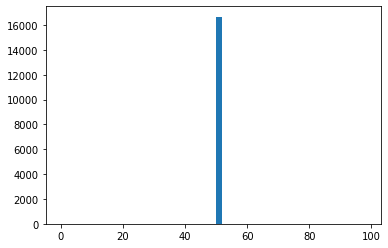

In [45]:
plt.hist(collected_returns, bins=range(0, 100, 2))
print(np.mean(collected_returns))

In [46]:
k_nodes = [n for n in G.nodes if G.in_degree(n) > 60]
len(k_nodes)

344

In [47]:
walks = walker.random_walks(G, n_walks=50, walk_len=50, alpha=0, start_nodes=k_nodes)
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 17200/17200 [00:00<00:00, 150171.06it/s]

Random walks - T=0.68s


49.630777280390674


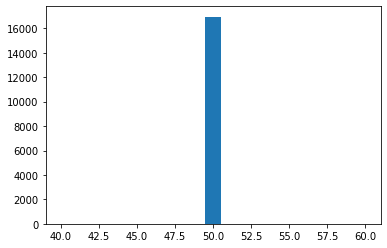

In [48]:
plt.hist(collected_returns, bins=np.linspace(40, 60, 20))
print(np.mean(collected_returns))

## returns times on scale-free graph

In [49]:
from scipy.stats import zipf

a = 2.5
seq = zipf.rvs(a, loc=1, size=10000)
if np.sum(seq) % 2 != 0:
    seq[0] = seq[0] + 1

G = nx.configuration_model(seq)

In [50]:
print(set(dict(G.degree).values()))

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 39, 41, 42, 43, 44, 45, 47, 48, 53, 55, 56, 57, 59, 64, 70, 71, 83, 102, 107, 125}


In [51]:
k_nodes = [n for n in G.nodes if G.degree(n) < 4]
len(k_nodes)

8813

In [52]:
walks = walker.random_walks(G, n_walks=30, walk_len=400, alpha=0, start_nodes=k_nodes)
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

  1%|          | 2382/264390 [00:00<00:11, 23817.13it/s]

Random walks - T=0.68s


100%|██████████| 264390/264390 [00:11<00:00, 23532.23it/s]


112.85651811218686


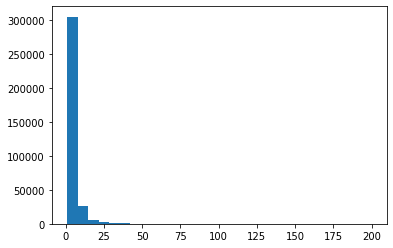

In [53]:
plt.hist(collected_returns, bins=np.linspace(1, 200, 30))
print(np.mean(collected_returns))

In [54]:
k_nodes = [n for n in G.nodes if G.degree(n) > 80]
len(k_nodes)

4

In [55]:
walks = walker.random_walks(G, n_walks=30, walk_len=400, alpha=0, start_nodes=k_nodes)
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 120/120 [00:00<00:00, 3231.28it/s]

Random walks - T=0.05s


84.15789473684211


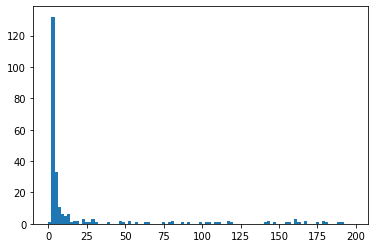

In [56]:
plt.hist(collected_returns, bins=range(0, 200, 2))
print(np.mean(collected_returns))

## Return times on WS graph

Theory predicts 

$$p_0(t) \sim t^{-D/2} \quad t\ll t_1$$
$$p_0(t) \sim e^{-(p^2t)^{1/3}} \quad t_1\ll t$$

with $t_1 \sim 1/p^2$, where $p$ is the shortcut probability

In [57]:
n_exp = 6
N = 10**n_exp
G = nx.watts_strogatz_graph(N, 6, 0.01)
walks = walker.random_walks(
    G,
    n_walks=20,
    walk_len=10000000,
    alpha=0,
    start_nodes=random.sample(list(G.nodes), 5),
)

Random walks - T=16.56s


In [58]:
collected_returns = []
for walk in tqdm(list(walks)):
    collected_returns.extend(list(return_time(walk)))

100%|██████████| 100/100 [01:47<00:00,  1.08s/it]


309826.9273809524


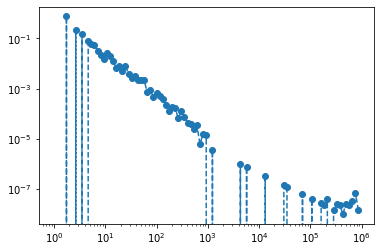

In [59]:
aa, bb = np.histogram(collected_returns, bins=np.logspace(0, 6, 100), density=True)
plt.loglog(bb[:-1], aa, "--o")
print(np.mean(collected_returns))

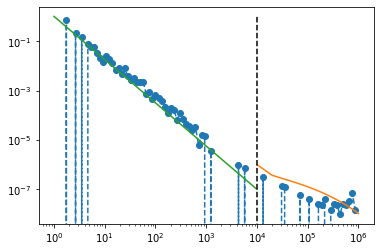

In [60]:
p = 0.01


def long_time_theory_ws(x, p, scaled=10e-7):
    return scaled * np.exp(-np.power((p**2) * (x - x[0]), 0.33))


def short_time_theory_ws(x, D, scaled=10e-1):
    return scaled * np.power(x, -D / 2)


plt.plot(bb[:-1], aa, "--o")

th_bins = np.linspace(1 / (p**2), 10**n_exp, 100)
plt.plot(th_bins, long_time_theory_ws(th_bins, p))

th_bins = np.linspace(1, 1 / (p**2), 100)
plt.plot(th_bins, short_time_theory_ws(th_bins, 3.5))


plt.yscale("log")
plt.xscale("log")
plt.vlines(1 / (p**2), 0, 1, color="k", linestyle="dashed")

---
---

# Graph Coverage

In [63]:
def discovered_nodes(walk, steps=10):
    L = []
    if isinstance(steps, int):
        bins = range(0, len(walk), steps)
    for i in steps:
        L.append(len(set(walk[:i])))
    return L;

### ER graph

In [61]:
G = nx.fast_gnp_random_graph(10000, 0.001)
walks = walker.random_walks(G, n_walks=1, walk_len=100000, alpha=0)

/Users/lordgrilo/Environments/pyenv3.8/lib/python3.8/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=11.76s


In [64]:
bins = np.logspace(0, 5, 15)
bins = list(map(int, bins))
covs = [discovered_nodes(walk, steps=bins) for walk in walks]

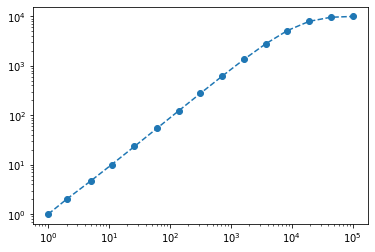

In [65]:
import pandas as pd

df = pd.DataFrame(covs)
plt.loglog(bins, df.mean(), "o--")

### WS model

In [ ]:
for n_exp in tqdm([3, 4, 5, 6]):
    N = 10**n_exp
    G = nx.watts_strogatz_graph(N, 6, 0.01)
    walks = walker.random_walks(
        G,
        n_walks=20,
        walk_len=10000000,
        alpha=0,
        start_nodes=random.sample(list(G.nodes), 5),
    )
    bins = np.logspace(0, 6, 20)
    bins = list(map(int, bins))
    covs = [discovered_nodes(walk, steps=bins) for walk in walks]
    import pandas as pd

    df = pd.DataFrame(covs)
    plt.loglog(bins[4:], df.mean()[4:], "o-", label=n_exp)
plt.legend()
plt.vlines(1 / p**2, 0, 10**6, color="k", linestyles="dashed")